In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import random

import sys
sys.executable


'/Users/johnhodson/miniconda3/bin/python'

In [2]:
def exact_coins_even_dist(flips=8, target=-1, num_sims=1000000):
    
    if target==-1:
        target=flips
        
    a,b = np.linspace(0,0.5,51),np.linspace(0.49,0,50)
    allcoins=np.hstack((a,b))
    plt.plot(allcoins)

    
    events=[]
    for sim in range(num_sims):
        prob_heads=npr.choice(allcoins)
#         print(prob_heads)
        R=npr.uniform(size=flips)
#         print(R)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
            
    vals,counts=np.unique(events,return_counts=True)
    plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    
#     custom histogram made with plt.bar and np.unique
    
    return events

In [3]:
def confidence_interval2(data, C):
    ''' Find the C% confidence interval given data'''
    pbar=1-C/100

    vals,counts=np.unique(data,return_counts=True)


    sum_counts=np.cumsum(counts/len(data))
    # locate the lowest value for which the cumulative sum exceeds the specified probability
    lower=np.nonzero(sum_counts>=pbar/2)[0][0]
    upper=np.nonzero(sum_counts>=(1-pbar/2))[0][0]
                  
    plt.bar(vals,sum_counts,width=0.01)
    plt.plot(vals,[pbar/2]*len(vals),'r')
    plt.plot(vals,[(1-pbar/2)]*len(vals),'g')
    
    print(C,"% confidence interval:[",vals[lower],",",vals[upper],"]")

1. Find and plot the a posteriori probabilities for getting 8 heads on 8 flips of a fair coin for a prior probabilities of your choice that have a peak around probability of heads equal to 0.5 (and that satisfy the requirements further below).

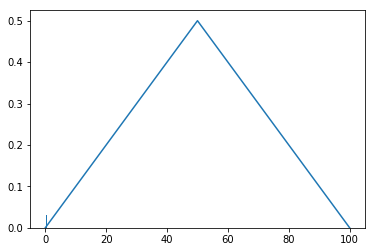

In [4]:
data=exact_coins_even_dist(8);

2. Determine the 95% and 99% confidence intervals under the a priori probabilities you created.

95 % confidence interval:[ 0.33 , 0.5 ]
99 % confidence interval:[ 0.3 , 0.5 ]


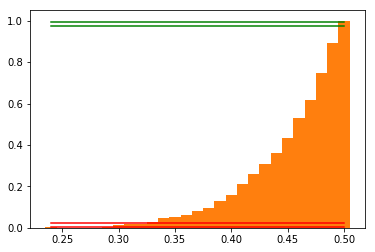

In [5]:
confidence_interval2(data, 95)
confidence_interval2(data, 99)

3. Determine whether you should reject the possibility that the coin is fair using the a priori probabilities that you created. Briefly explain how you reached your conclusions.

We should not reject the possibility that the coin is fair using the a priori probabilities that I created because we found that 0.5 (the fair coin) was contained within both the 99% and the 95% confidence intervals.